I0 shape (500, 600), type int64, max 340


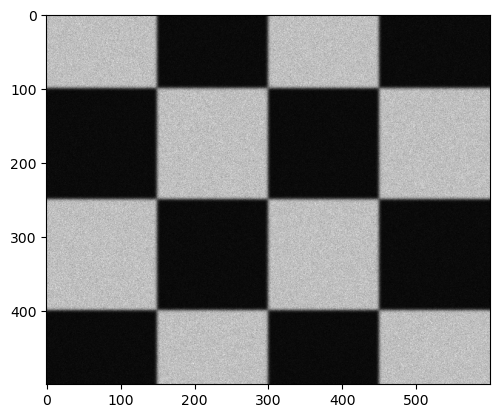

In [1]:
import numpy as np
import opticiq as iq
from opticiq import data
from matplotlib import pyplot as plt

I0 = data.demoS.cb
print('I0 shape %s, type %s, max %d' % (I0.shape, I0.dtype, I0.max()))
plt.imshow(I0, cmap='gray')

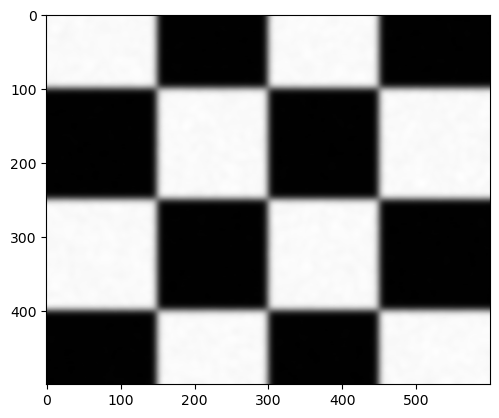

In [2]:
# run cb recipe
imG, roi = iq.recipe_checkerboard2(I0, 4)
# show the blurred version, note that noise is reduced and gradient zones increased
plt.imshow(imG['I1'], cmap='gray')

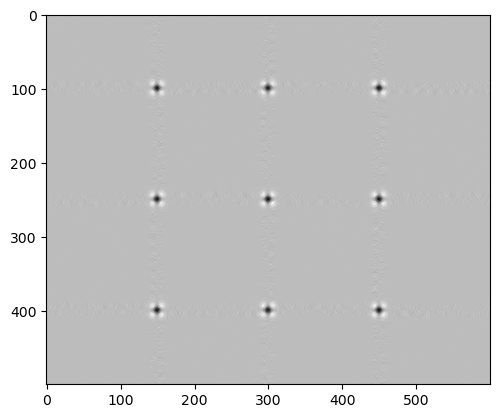

In [3]:
# show Hessian Determinant of blurred
plt.imshow(imG['D_hessian'], cmap='gray')

TODO
----
* Peak finding
* Grid intelligence